# Домашняя работа
### Тема: Временные ряды, общая теория

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

In [3]:
def test_stationarity(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    return dfoutput

In [4]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [5]:
def plot_lineplot(x, y, ds, title,  xticks_rate=10):
    sns.lineplot(x=x,y=y, data=ds)
    plt.xticks(ds[::xticks_rate].index, ds[::xticks_rate][x], rotation=30)
    plt.title(f'{title} (p-val: {test_stationarity(ds[y])["p-value"]:.3f})')

Ограбления в Бостоне

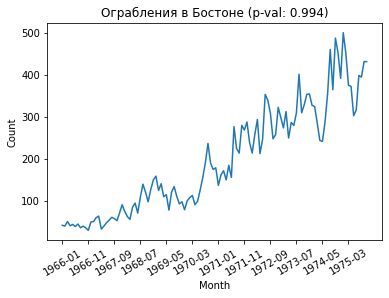

In [6]:
ds = robberies_in_boston
plot_lineplot('Month', 'Count', ds, 'Ограбления в Бостоне')

Нормализуем дисперсию

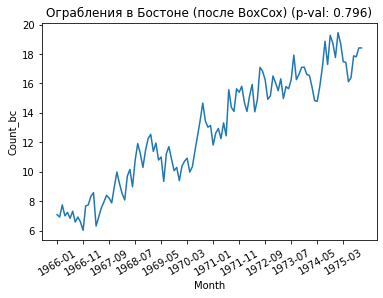

In [7]:
ds['Count_bc'] = boxcox(ds['Count'])[0]
plot_lineplot('Month', 'Count_bc', ds, 'Ограбления в Бостоне (после BoxCox)')

Тренд остался

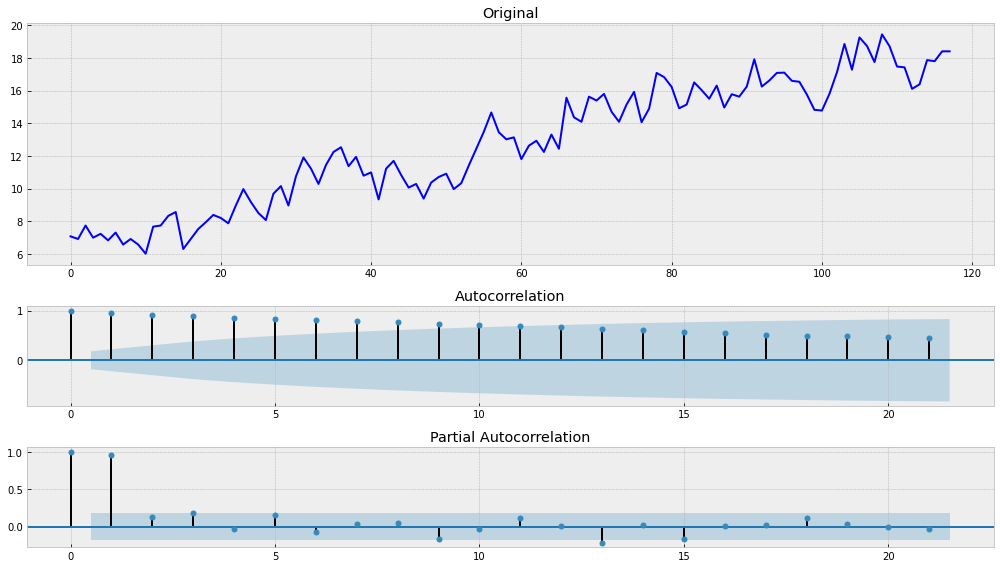

In [8]:
tsplot(ds['Count_bc'])

Дифференцируем ряд.



Test Statistic                -6.064062e+00
p-value                        1.193444e-07
#Lags Used                     1.000000e+01
Number of Observations Used    1.070000e+02
Critical Value (1%)           -3.492996e+00
Critical Value (5%)           -2.888955e+00
Critical Value (10%)          -2.581393e+00
dtype: float64

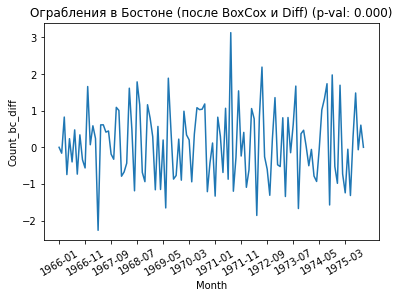

In [9]:
ds['Count_bc_diff'] = ds['Count_bc'].diff().fillna(0)
plot_lineplot('Month', 'Count_bc_diff', ds, 'Ограбления в Бостоне (после BoxCox и Diff)')
test_stationarity(ds['Count_bc_diff'])

Получаем стационарный ряд.

Test Statistic                -7.484383e+00
p-value                        4.680778e-11
#Lags Used                     1.000000e+01
Number of Observations Used    1.070000e+02
Critical Value (1%)           -3.492996e+00
Critical Value (5%)           -2.888955e+00
Critical Value (10%)          -2.581393e+00
dtype: float64

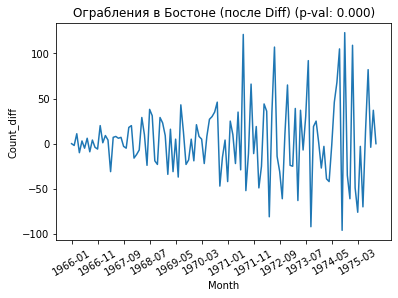

In [10]:
ds['Count_diff'] = ds['Count'].diff().fillna(0)
plot_lineplot('Month', 'Count_diff', ds, 'Ограбления в Бостоне (после Diff)')
test_stationarity(ds['Count_diff'])

Видим увеличивающуюся дисперсию ряда. BoxCox был нужен.



Dowjones Closing

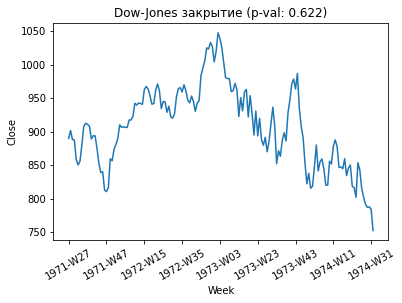

In [11]:
ds = dowjones_closing
plot_lineplot('Week', 'Close', ds, 'Dow-Jones закрытие', xticks_rate=20)

График сильно волатильный. 
Применяем BoxCox.

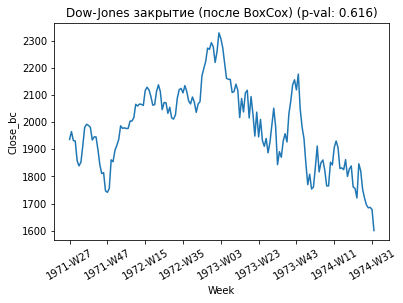

In [12]:
ds['Close_bc'] = boxcox(ds['Close'])[0]
plot_lineplot('Week', 'Close_bc', ds, 'Dow-Jones закрытие (после BoxCox)', xticks_rate=20)

Смотрим на автокорреляцию.

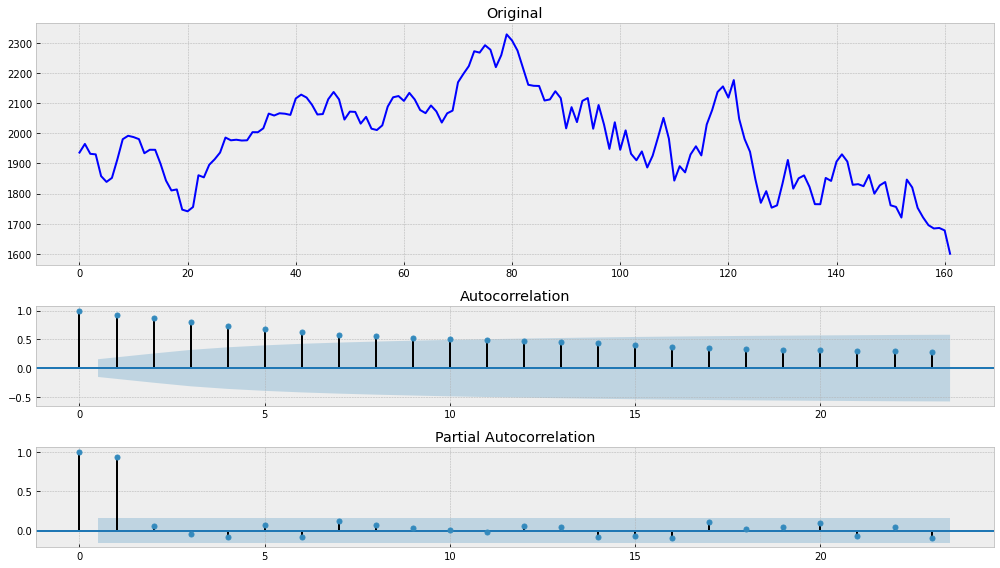

In [13]:
tsplot(ds['Close_bc'])

Проводим дифференцирование

Test Statistic                -1.305079e+01
p-value                        2.144184e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.610000e+02
Critical Value (1%)           -3.471633e+00
Critical Value (5%)           -2.879665e+00
Critical Value (10%)          -2.576434e+00
dtype: float64

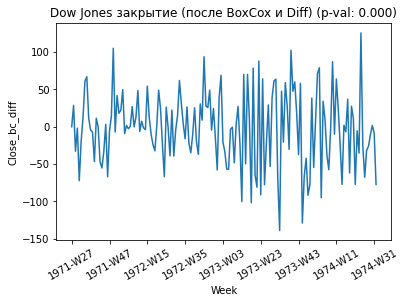

In [14]:
ds['Close_bc_diff'] = ds['Close_bc'].diff().fillna(0)
plot_lineplot('Week', 'Close_bc_diff', ds, 'Dow Jones закрытие (после BoxCox и Diff)', xticks_rate=20)
test_stationarity(ds['Close_bc_diff'])

Ряд очень похож на стационарный.